<a href="https://colab.research.google.com/github/paulinasv/Clases_SIC_IA/blob/main/ejemplo_beans_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Ejemplo con "frijoles" (Dataset de tensorflow)


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Importar data 'beans'
beans, beans_info = tfds.load('beans', with_info=True, as_supervised=True, shuffle_files=False)

In [ ]:
beans.keys()

dict_keys(['train', 'validation', 'test'])

(10, 500, 500, 3) tf.Tensor([1 1 0 0 1 0 0 0 0 1], shape=(10,), dtype=int64)


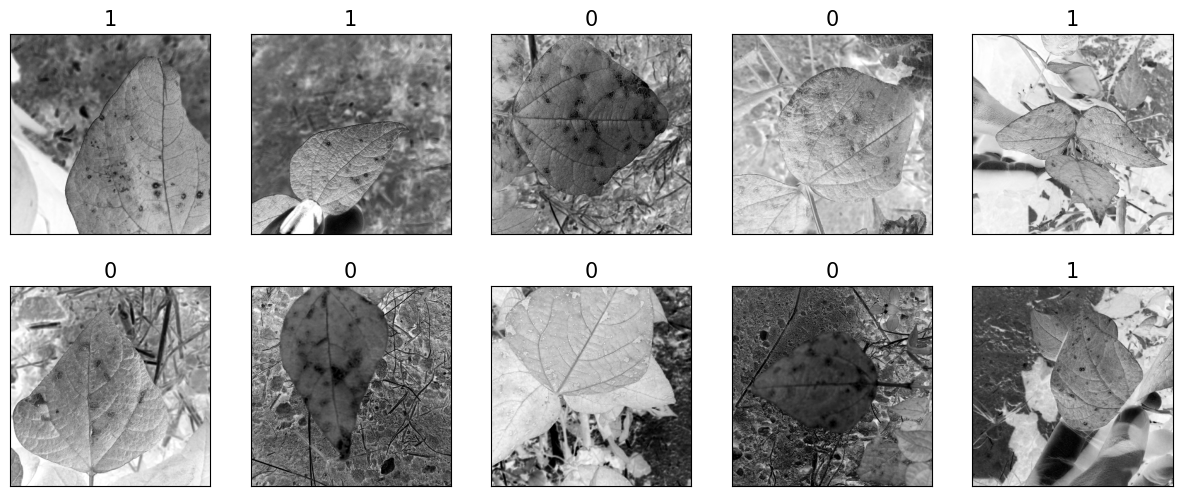

In [ ]:
ds_train = beans['train']

assert isinstance(ds_train, tf.data.Dataset)

#ds_train = ds_train.map(lambda item:
   # (item['image'], item['label']))
ds_train = ds_train.map(lambda image, label:
    (tf.image.convert_image_dtype(image, tf.float32), label))
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
plt.show()